In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [25]:
# Load the dataset
df = pd.read_csv('C:/Users/PMLS/Desktop/sp500_historical_data_2.csv')


In [26]:
# Display the column names of the dataframe
print("Column names in the dataframe:")
print(df.columns)

Column names in the dataframe:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [27]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/2010,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
1,1/5/2010,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2,1/6/2010,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
3,1/7/2010,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
4,1/8/2010,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [28]:
# Check for missing values
print("Missing values in the dataset:")
display(df.isnull().sum())

Missing values in the dataset:


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [29]:
# Display basic statistics of the dataset
print("Basic statistics of the dataset:")
display(df.describe())

Basic statistics of the dataset:


,Open,High,Low,Close,Adj Close,Volume
count,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3.753000e+03
mean,2709.325337,2723.763659,2693.889275,2709.906826,2709.906826,3.938816e+09
std,1244.213655,1250.586736,1237.540115,1244.378482,1244.378482,9.476472e+08
min,1027.650024,1032.949951,1010.909973,1022.580017,1022.580017,1.025000e+09
25%,1696.060059,1703.439941,1691.130005,1697.420044,1697.420044,3.374260e+09
50%,2425.659912,2433.949951,2408.550049,2425.179932,2425.179932,3.782390e+09
75%,3788.729980,3820.959961,3749.620117,3790.929932,3790.929932,4.300700e+09
max,6014.109863,6044.169922,6003.979980,6032.379883,6032.379883,1.061781e+10


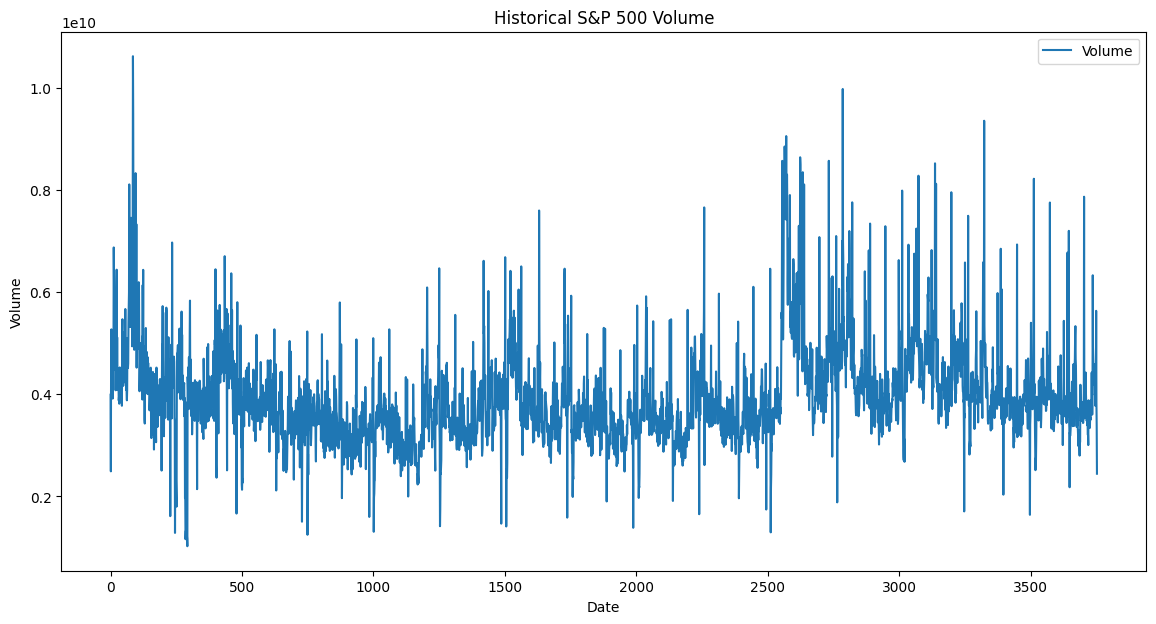

In [30]:
# Plot the 'Volume' to visualize the historical trend
plt.figure(figsize=(14, 7))
plt.plot(df['Volume'], label='Volume')
plt.title('Historical S&P 500 Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

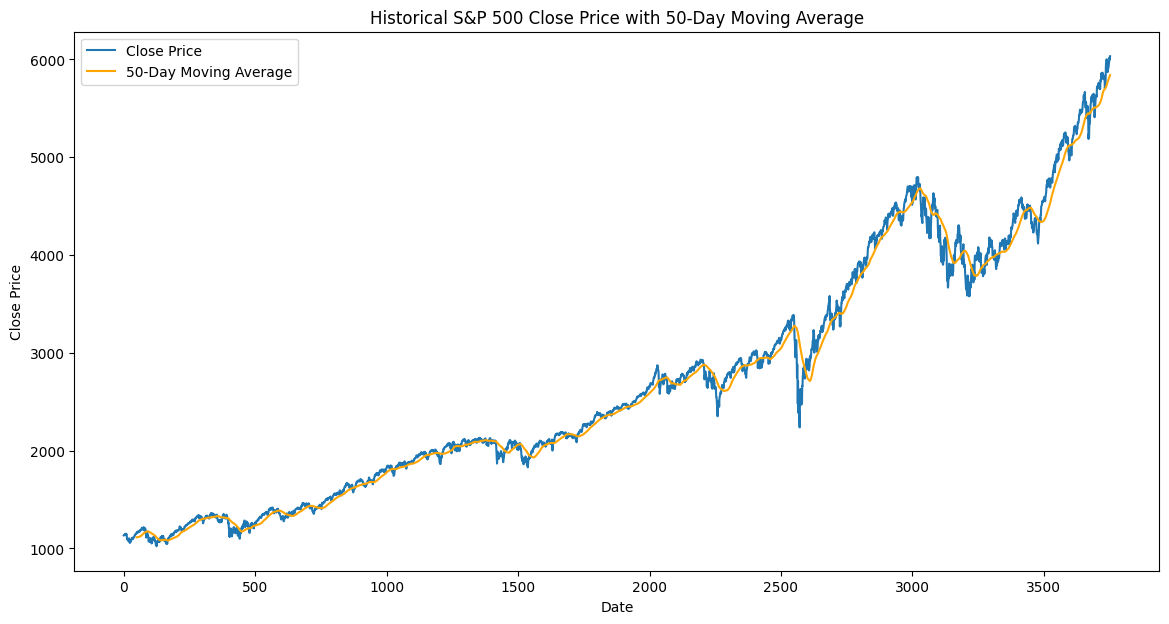

In [31]:
# Calculate the moving average of the 'Close' price
df['Moving_Avg'] = df['Close'].rolling(window=50).mean()

# Plot the 'Close' price along with its moving average
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Moving_Avg'], label='50-Day Moving Average', color='orange')
plt.title('Historical S&P 500 Close Price with 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
# Assuming 'Close' is the target variable and we use 'Open', 'High', 'Low', 'Volume', and 'Moving_Avg' as features
features = ['Open', 'High', 'Low', 'Volume', 'Moving_Avg']
target = 'Close'

# Drop rows with missing values in the features
df_clean = df.dropna(subset=features)

X = df_clean[features]
y = df_clean[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 116.62323736931468


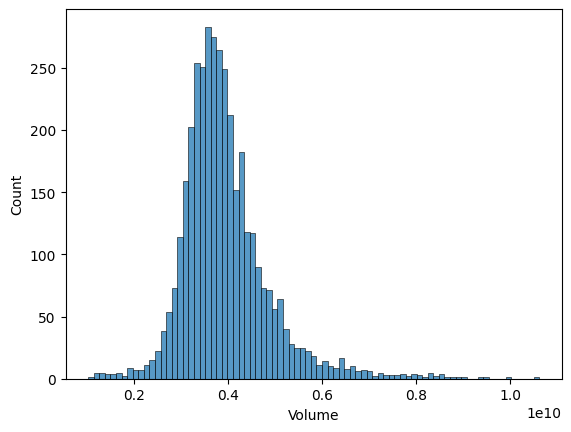

In [35]:
# Visualize the distribution of a specific column
sns.histplot(df['Volume'])
plt.show()


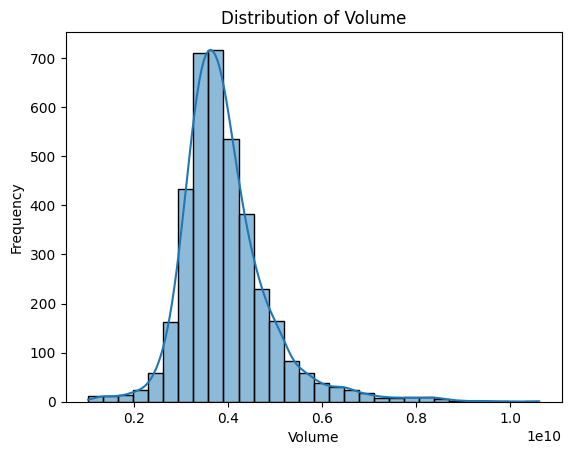

In [37]:
# Visualize the distribution of a specific column
if 'Volume' in df.columns:  # Check if the column exists
    sns.histplot(df['Volume'], kde=True, bins=30)  # Added KDE for better visualization
    plt.title('Distribution of Volume')
    plt.xlabel('Volume')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Volume' not found in the dataset.")



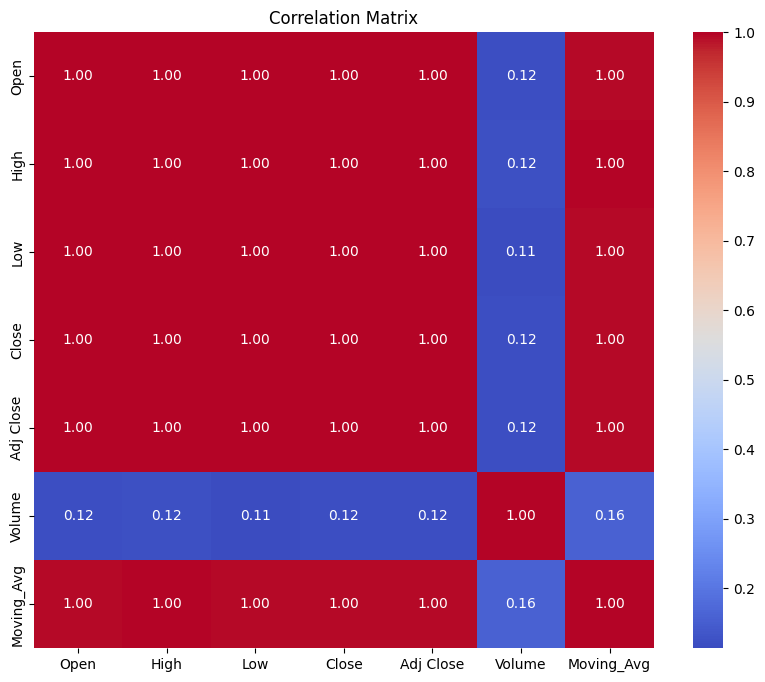

First 5 rows of the scaled dataset:
       Open      High       Low     Close  Adj Close    Volume  Moving_Avg
0 -1.280309 -1.271488 -1.274738 -1.267401  -1.267401  0.055496         NaN
1 -1.267367 -1.269280 -1.264151 -1.264564  -1.264564 -1.527984         NaN
2 -1.264915 -1.267233 -1.260684 -1.264066  -1.264066  1.091104         NaN
3 -1.264465 -1.264618 -1.262810 -1.260409  -1.260409  1.405630         NaN
4 -1.261049 -1.262275 -1.258850 -1.257765  -1.257765  0.475740         NaN


In [38]:
# Visualize the correlation matrix
try:
    correlation_matrix = df.select_dtypes(include=[np.number]).corr()  # Select only numeric columns
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()
except Exception as e:
    print(f"Error in calculating correlation matrix: {e}")

# Standardize the dataset
try:
    numeric_data = df.select_dtypes(include=[np.number])  # Extract numeric columns
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)

    # Convert the scaled data back to a DataFrame
    scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

    # Display the first few rows of the scaled dataset
    print("First 5 rows of the scaled dataset:")
    print(scaled_df.head())
except Exception as e:
    print(f"Error in standardizing the dataset: {e}")


so the values could be stored in form of .csv for the whole dataset and can be stored
